# Capstone Project Battle of the Neighborhoods

## Introduction

Gurgaon is a city just southwest of New Delhi in northern India. Gurgaon has become a leading financial and banking center in India after Mumbai and Chennai. The city's economic growth story started when the leading Indian automobile manufacturer Maruti Suzuki India Limited established a manufacturing plant in Gurgaon in the 1970s. Today, Gurgaon has local offices for more than 250 Fortune 500 companies. Gurgaon is categorized as very high on the Human Development Index, with an HDI of 0.889 (2017), which is also the highest in India. 

Also known as the ‘Millenium City of India’, Gurgaon is abundant with shopping malls, tech companies, and hotels, but the city’s street food scene is also impeccable. Given that Gurgaon is a city filled with tech companies and businessmen who are extremely busy throughout the day, we will be investigating the best neighborhoods for fast food restaurants in Gurgaon where businessmen can get their food on the go.

#### Questions that will be answered in this report:  

What is best location in Gurgaon for Fast Food ?  
Which areas have large number of Fast Food restaurants ?  
Which all areas have the least number of resturants ?  
What is the best place to stay if one prefers Fast Food ?  
What places are have best restaurant in Gurgaon?  

#### Target Audience

The target audience is for those potentially looking for a new home and want to be close to a restaurant. Also, people who may be searching for a new neighborhood with lots of restaurants especially fast food.

## Data
For this project we will use the following data :  
Data about Gurgaon restaurants which contains their locality, restaurant name, rating, latitude and longitude.  
The source for this data will be the Zomato Kaggle Dataset: "https://www.kaggle.com/shrutimehta/zomato-restaurants-data"  
Description : This data set contains the required information. Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world.  

We also need to know the nearby places (restaurants) in each neighborhood of Gurgaon.  
Our data source for this is the Fousquare API : "https://developer.foursquare.com/"  
We will use this API to get all the venues in each neighborhood.

## Approach
• Collect the Gurgaon city data from the Zomato Kaggle Dataset  
• Then, using the FourSquare API find all venues for each neighborhood.  
• Filter out all venues that are nearby by locality.  
• Using aggregative rating for each restaurant to find the best places.  
• Visualize the ranking of neighborhoods using the folium library.  

In [1]:
 import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


#### Read the data from the Zomato Kaggle Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Gurgaon']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


### Remove unwanted rows and columns from table

In [3]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


### Create maps to show restaurant clusters

In [4]:
Gurgaon_Rest = folium.Map(location=[28.4595, 77.0266], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Gurgaon_Rest)  

Gurgaon_Rest

### What places have the best restaurants in Gurgaon?

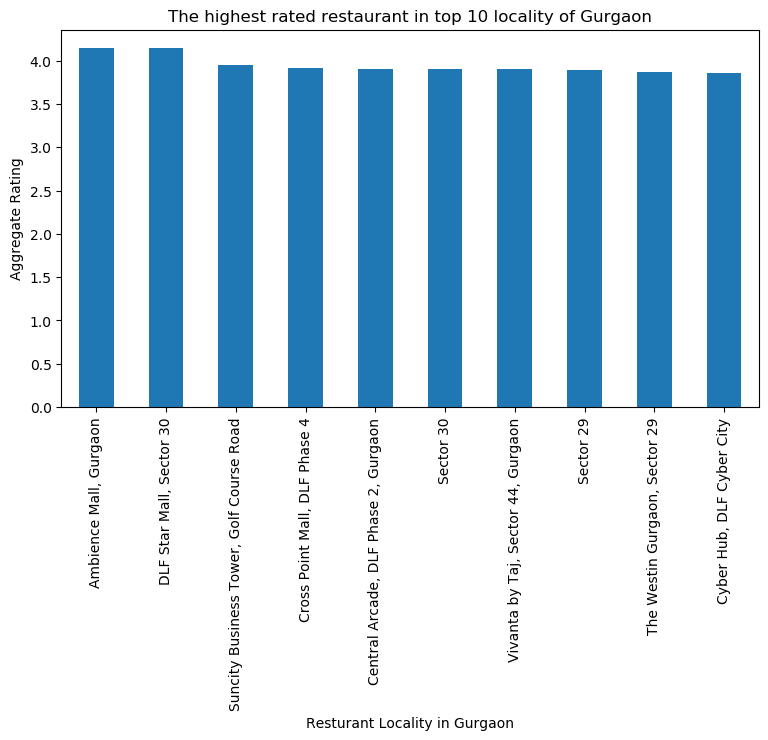

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated restaurant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restaurants are available in the Ambience Mall area in Gurgaon.

### What places have the worst restaurants in Gurgaon?

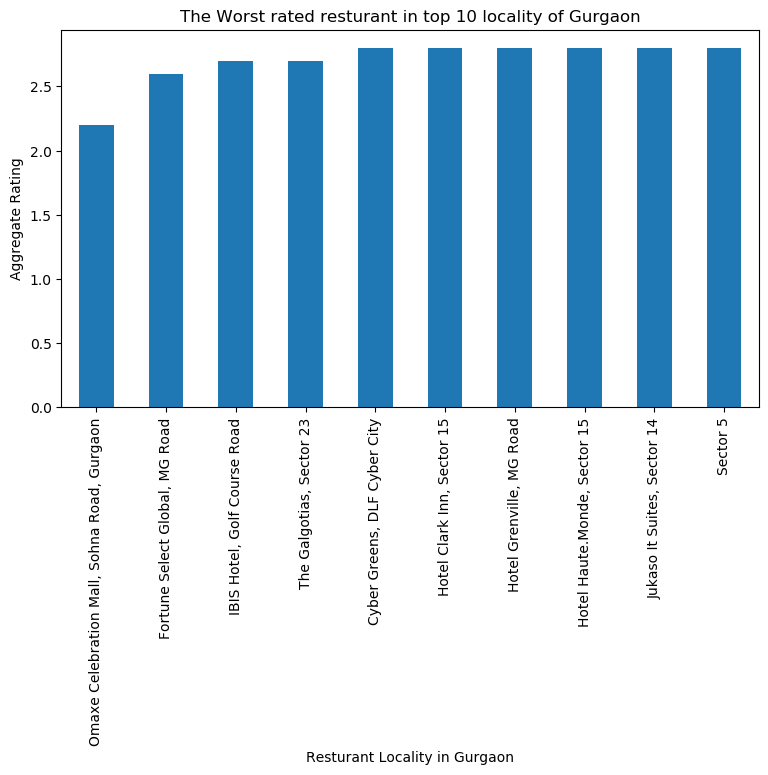

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The Omaxe Celebration Mall, Sohna Road area has the worst restaurants in Gurgaon.

### Which neighborhoods are good for people who like to eat?

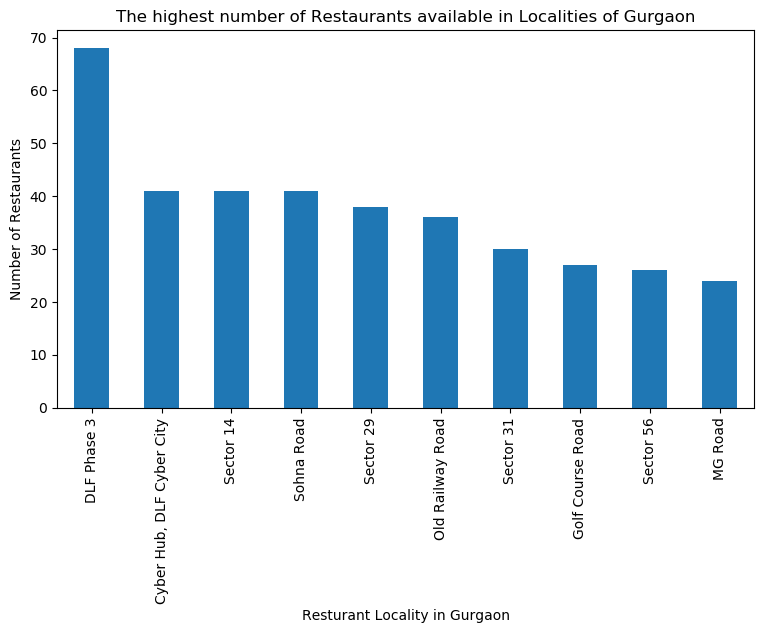

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurants available in Localities of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurants')

#displays the plot
plt.show()

DLF Phase 3 has the highest number of restaurants and would be a good neighborhood for someone who likes to eat out.

### Which neighborhoods are not good for people who like to eat?

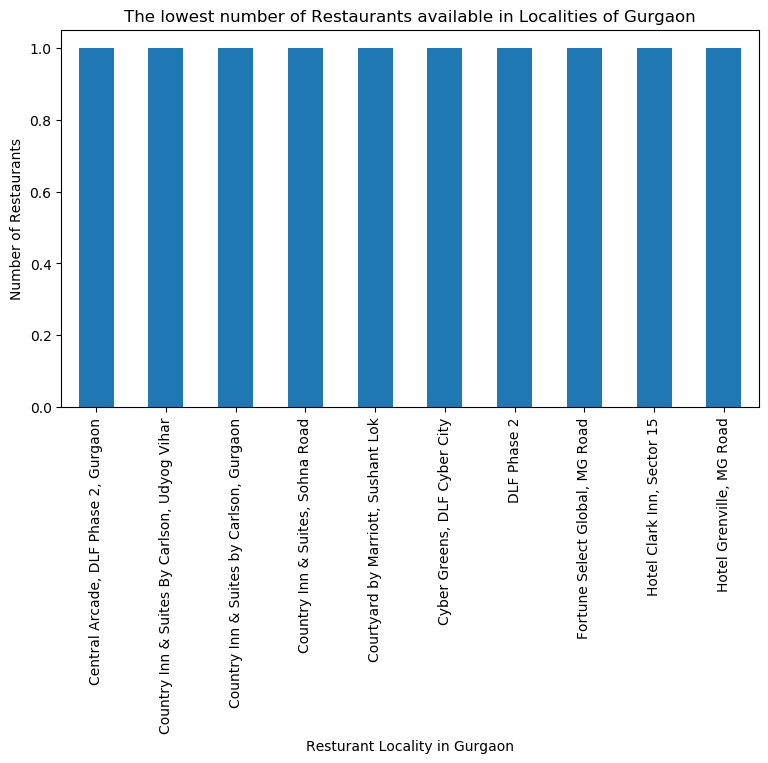

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurants available in Localities of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurants')

#displays the plot
plt.show()

All of the locations above would not be a suitable neighborhood for those who enjoy eating outside due to the lack of restaurants within their neighborhoods.

### Which places are the best for a fast food restaurant in Gurgaon?

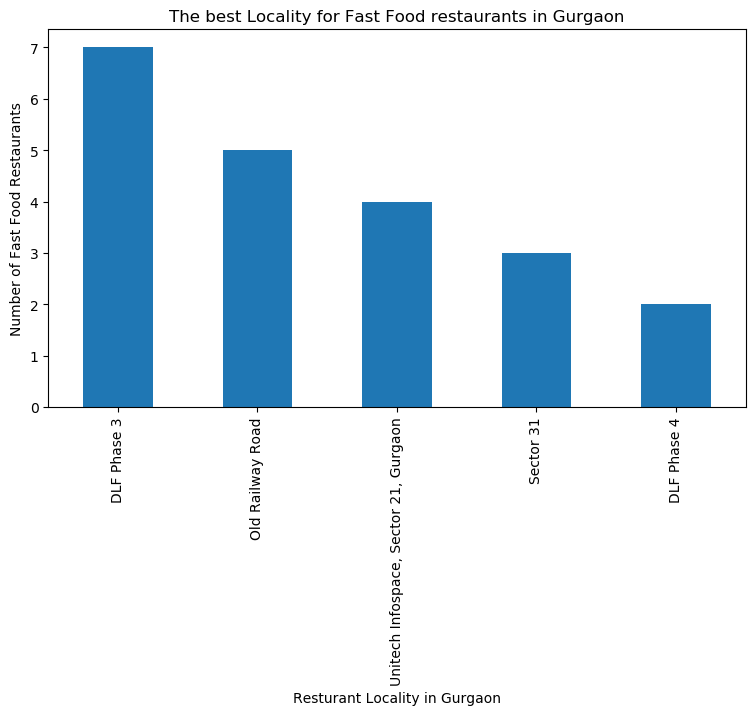

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Fast Food restaurants in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Fast Food')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Fast Food Restaurants')

#displays the plot
plt.show()

DLF Phase 3 is the best locality for fast food.

### Which restaurants are the best fast food restaurants in Gurgaon?

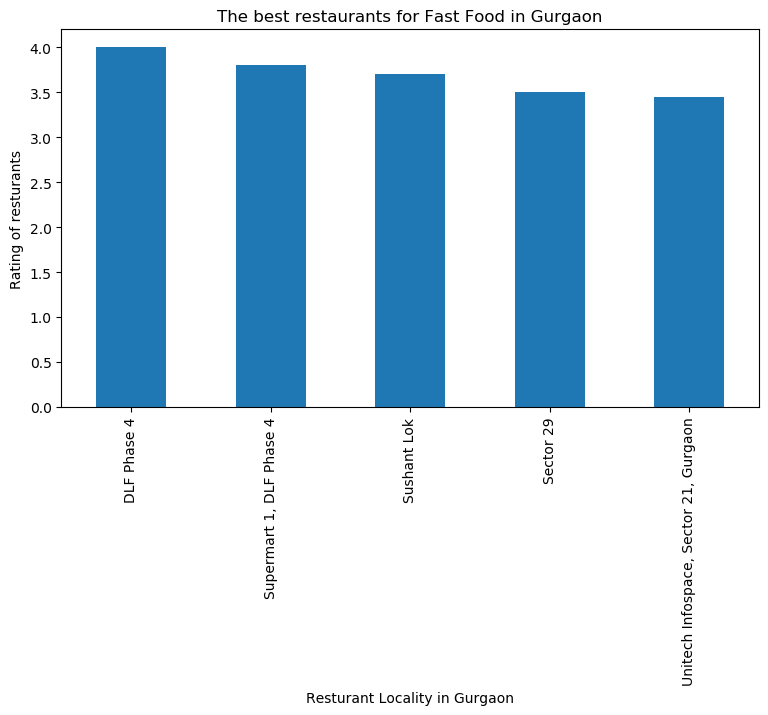

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best restaurants for Fast Food in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Fast Food')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

DLF Phase 4 is the best fast food restaurant

### Group the data based on locality

In [16]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [17]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28


In [18]:
df_final.shape

(110, 8)

### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'XXX' # your Foursquare ID
CLIENT_SECRET = 'XXX' # your Foursquare Secret
VERSION = '20191028'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2QKAFSCLC0E3NH3XVVPQ1VEMJA1EHHH4QN0T1BTK2BT1LA2I
CLIENT_SECRET:G2KFGSDXXM1LRYGBGH4P5D3TLRUNEGMLYUZMEOQAKDARUFYT


### Create a function to repeat the same process for all the localities in Gurgaon

In [20]:

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Find the venues in all of the Gurgaon localities

In [21]:
gurgaon_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

In [22]:
gurgaon_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [23]:
gurgaon_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",12,12,12,12,12,12
"Ambience Mall, Gurgaon",40,40,40,40,40,40
"Ansal Plaza Mall, Palam Vihar",5,5,5,5,5,5
Ardee City,4,4,4,4,4,4
"Best Western Skycity Hotel, Sector 15, Gurgaon",5,5,5,5,5,5
...,...,...,...,...,...,...
"Unitech Infospace, Sector 21, Gurgaon",8,8,8,8,8,8
"Vivanta by Taj, Sector 44, Gurgaon",11,11,11,11,11,11
"Vyapar Kendra, Palam Vihar",4,4,4,4,4,4


In [24]:
print('There are {} uniques categories.'.format(len(gurgaon_venues['Venue Category'].unique())))

There are 131 uniques categories.


### One Hot Encoding

In [25]:
## Analyze Each Locality

# one hot encoding
gurgaon_onehot = pd.get_dummies(gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
gurgaon_onehot['Locality'] = gurgaon_venues['Locality'] 

# move Locality column to the first column
column_list = gurgaon_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
gurgaon_onehot = gurgaon_onehot[column_list]

gurgaon_onehot.head()

,Locality,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,...,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
gurgaon_grouped = gurgaon_onehot.groupby('Locality').mean().reset_index()
gurgaon_grouped

,Locality,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,...,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0.0,0.00,0.000,0.000000,0.00,0.0,0.083333,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Ambience Mall, Gurgaon",0.0,0.05,0.025,0.000000,0.05,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Ansal Plaza Mall, Palam Vihar",0.0,0.00,0.000,0.000000,0.00,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Ardee City,0.0,0.00,0.000,0.000000,0.00,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",0.0,0.00,0.000,0.000000,0.20,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,"Unitech Infospace, Sector 21, Gurgaon",0.0,0.00,0.000,0.000000,0.00,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.125000,0.0,0.125000,0.0,0.0,0.0,0.0,0.0
105,"Vivanta by Taj, Sector 44, Gurgaon",0.0,0.00,0.000,0.090909,0.00,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.0,0.0
106,"Vyapar Kendra, Palam Vihar",0.0,0.00,0.000,0.000000,0.25,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
107,"Vyapar Kendra, Sushant Lok",0.0,0.00,0.000,0.000000,0.00,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
gurgaon_grouped.shape

(109, 132)

### Print each Locality along with the top 5 most common venues

In [28]:

num_top_venues = 5

for hood in gurgaon_grouped['Locality']:
    print("----"+hood+"----")
    temp = gurgaon_grouped[gurgaon_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
               venue  freq
0      Movie Theater  0.17
1  Indian Restaurant  0.17
2            Brewery  0.17
3   Department Store  0.08
4      Shopping Mall  0.08


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.15
1  Fast Food Restaurant  0.08
2                   Bar  0.05
3             Multiplex  0.05
4      Asian Restaurant  0.05


----Ansal Plaza Mall, Palam Vihar----
            venue  freq
0  Sandwich Place   0.2
1     Pizza Place   0.2
2            Food   0.2
3             Gym   0.2
4            Café   0.2


----Ardee City----
               venue  freq
0  Indian Restaurant  0.25
1  Convenience Store  0.25
2    Thai Restaurant  0.25
3        Beer Garden  0.25
4             Office  0.00


----Best Western Skycity Hotel, Sector 15, Gurgaon----
                            venue  freq
0                           Hotel   0.6
1                  Farmers Market   0.2
2                Asian Restaurant   0.

                  venue  freq
0     Indian Restaurant  0.22
1           Supermarket  0.11
2  Fast Food Restaurant  0.11
3        Sandwich Place  0.11
4        Shop & Service  0.11


----JMD Regent Arcade Mall, MG Road----
               venue  freq
0  Indian Restaurant  0.19
1   Department Store  0.12
2                Gym  0.06
3        Coffee Shop  0.06
4     Scenic Lookout  0.06


----Jukaso It Suites, Sector 14----
                            venue  freq
0                    Dessert Shop  0.33
1                    Liquor Store  0.33
2                      Shoe Store  0.33
3  Multicuisine Indian Restaurant  0.00
4                       Multiplex  0.00


----Kingdom of Dreams, Sector 29----
               venue  freq
0  Indian Restaurant  0.16
1              Hotel  0.12
2               Café  0.08
3                Bar  0.08
4               Park  0.08


----Le Meridien Gurgaon, MG Road----
                venue  freq
0               Hotel  0.25
1          Hotel Pool  0.12
2  Italian Res

                  venue  freq
0                  Café  0.19
1     Indian Restaurant  0.12
2  Fast Food Restaurant  0.12
3         Shopping Mall  0.06
4        Ice Cream Shop  0.06


----South City 2----
                venue  freq
0         Snack Place   0.5
1                Park   0.5
2  Miscellaneous Shop   0.0
3               Plaza   0.0
4            Platform   0.0


----Suncity Business Tower, Golf Course Road----
                            venue  freq
0               Indian Restaurant  0.14
1                     Pizza Place  0.14
2                   Metro Station  0.14
3                            Café  0.14
4  Multicuisine Indian Restaurant  0.14


----Supermart 1, DLF Phase 4----
                  venue  freq
0            Restaurant  0.18
1                Market  0.09
2                Lounge  0.09
3           Flower Shop  0.09
4  Fast Food Restaurant  0.09


----Sushant Lok----
               venue  freq
0              Hotel  0.21
1               Café  0.16
2          Hotel Bar

### Write a function to sort the venues in descending order


In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Display top 10 venues for each locality

In [30]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = gurgaon_grouped['Locality']

for ind in np.arange(gurgaon_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gurgaon_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Movie Theater,Brewery,Indian Restaurant,Shopping Mall,Sporting Goods Shop,Multiplex,Fast Food Restaurant,Department Store,BBQ Joint,Gift Shop
1,"Ambience Mall, Gurgaon",Indian Restaurant,Fast Food Restaurant,Café,American Restaurant,Asian Restaurant,Multiplex,Clothing Store,Bar,Italian Restaurant,Shopping Mall
2,"Ansal Plaza Mall, Palam Vihar",Gym,Pizza Place,Sandwich Place,Food,Café,Wine Bar,Falafel Restaurant,Flea Market,Fast Food Restaurant,Farmers Market
3,Ardee City,Convenience Store,Indian Restaurant,Thai Restaurant,Beer Garden,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Asian Restaurant,Farmers Market,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...
104,"Unitech Infospace, Sector 21, Gurgaon",Pizza Place,Café,Fast Food Restaurant,Thai Restaurant,Sandwich Place,Tea Room,Donut Shop,Electronics Store,Flea Market,Farmers Market
105,"Vivanta by Taj, Sector 44, Gurgaon",Hotel,Pizza Place,Art Gallery,Thai Restaurant,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Restaurant,Resort,Donut Shop
106,"Vyapar Kendra, Palam Vihar",Café,Market,Asian Restaurant,Shopping Mall,Farmers Market,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant
107,"Vyapar Kendra, Sushant Lok",Restaurant,Hotel,Hotel Bar,Sandwich Place,Indian Restaurant,Lounge,Market,Flower Shop,Fast Food Restaurant,Diner


### Use k-means to cluster into 5 

In [31]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

gurgaon_clustering = gurgaon_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gurgaon_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(109,)

### Add clustering labels


In [37]:
gurgaon_merged = df_final.head(109)
gurgaon_merged['Cluster Labels'] = kmeans.labels_

gurgaon_merged = gurgaon_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

gurgaon_merged.head()

C:\Users\nasta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96,4,Movie Theater,Brewery,Indian Restaurant,Shopping Mall,Sporting Goods Shop,Multiplex,Fast Food Restaurant,Department Store,BBQ Joint,Gift Shop
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689,4,Indian Restaurant,Fast Food Restaurant,Café,American Restaurant,Asian Restaurant,Multiplex,Clothing Store,Bar,Italian Restaurant,Shopping Mall
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19,1,Gym,Pizza Place,Sandwich Place,Food,Café,Wine Bar,Falafel Restaurant,Flea Market,Fast Food Restaurant,Farmers Market
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65,4,Convenience Store,Indian Restaurant,Thai Restaurant,Beer Garden,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28,2,Hotel,Asian Restaurant,Farmers Market,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Electronics Store


### Create final map

In [46]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gurgaon_merged['Lat'], gurgaon_merged['Lng'], gurgaon_merged['Locality'], gurgaon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters


In [41]:
## Cluster 1
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 0, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
100,28.239367,3.55,"Average, Good",67,0,Indian Restaurant,Wine Bar,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store


In [42]:
## Cluster 2
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 1, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.511460,3.000000,Average,19,1,Gym,Pizza Place,Sandwich Place,Food,Café,Wine Bar,Falafel Restaurant,Flea Market,Fast Food Restaurant,Farmers Market
6,28.443040,3.500000,"Average, Good, Very Good",1214,1,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Hotel,Ice Cream Shop,Diner,Sandwich Place,Café,Farmers Market,Flower Shop
12,28.468311,3.912500,"Good, Very Good",1841,1,Café,Indian Restaurant,Bakery,Coffee Shop,Sandwich Place,Italian Restaurant,Beer Garden,Restaurant,Burger Joint,Chinese Restaurant
17,28.467327,3.582353,"Average, Good, Poor, Very Good",3208,1,Café,Indian Restaurant,Bakery,Coffee Shop,Sandwich Place,Italian Restaurant,Beer Garden,Restaurant,Burger Joint,Chinese Restaurant
22,28.466065,3.804762,"Average, Good, Very Good",3414,1,Café,Restaurant,Indian Restaurant,Italian Restaurant,Bakery,Coffee Shop,Beer Garden,Lounge,Sandwich Place,Fast Food Restaurant
23,28.448633,3.675000,"Average, Good",214,1,Gourmet Shop,Beer Garden,Pizza Place,Coffee Shop,Chinese Restaurant,Café,Food & Drink Shop,Lounge,Shopping Mall,Japanese Restaurant
24,28.447905,3.706667,"Average, Good, Very Good",2920,1,Brewery,Beer Garden,Pizza Place,Gourmet Shop,Falafel Restaurant,Chinese Restaurant,Café,Food & Drink Shop,Lounge,Shopping Mall
32,28.443011,3.559259,"Average, Excellent, Good, Very Good",3443,1,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Hotel,Pizza Place,Ice Cream Shop,Diner,Sandwich Place,Nightclub,Café
33,28.421012,3.000000,Average,333,1,Convenience Store,Café,Sandwich Place,Shopping Mall,Pizza Place,Dessert Shop,Department Store,Dim Sum Restaurant,Diner,Donut Shop
39,28.447023,2.700000,Average,96,1,Falafel Restaurant,Chinese Restaurant,Café,Brewery,Beer Garden,Pizza Place,Gourmet Shop,Sandwich Place,Shopping Mall,Japanese Restaurant


In [43]:
## Cluster 3
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 2, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.8500,Average,28,2,Hotel,Asian Restaurant,Farmers Market,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Electronics Store
8,28.461988,3.8000,Good,91,2,Hotel,Japanese Restaurant,Resort,Indian Restaurant,Go Kart Track,Café,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
9,28.468385,3.2500,"Average, Good",44,2,Hotel,Indian Restaurant,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Wine Bar
10,28.334942,3.4000,Average,19,2,Hotel,Food Court,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Falafel Restaurant
34,28.457610,2.8000,Average,7,2,Hotel,Asian Restaurant,Farmers Market,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Electronics Store
35,28.465600,2.8000,Average,15,2,Hotel,Restaurant,Fast Food Restaurant,Food,Flower Shop,Flea Market,Farmers Market,Falafel Restaurant,Electronics Store,Coworking Space
45,28.470510,3.0000,Average,35,2,Hotel,Indian Restaurant,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Wine Bar
57,28.459079,3.2000,Average,13,2,Hotel,Farmers Market,Dessert Shop,Market,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Wine Bar
67,28.457396,2.9600,Average,99,2,Hotel,Department Store,Asian Restaurant,Farmers Market,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Electronics Store
71,28.503608,3.2625,"Average, Good",327,2,Hotel,Sports Club,Café,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Food Court,Falafel Restaurant


In [44]:
## Cluster 4

gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 3, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,28.460925,3.200000,Average,6,3,Hotel,Restaurant,Indian Restaurant,Hotel Bar,Chinese Restaurant,Bakery,Café,Convenience Store,Sandwich Place,Diner
25,28.461636,4.150000,Very Good,306,3,Coffee Shop,Tea Room,Multiplex,Chinese Restaurant,Restaurant,Brewery,Hotel,Athletics & Sports,BBQ Joint,Dim Sum Restaurant
28,28.422147,3.500000,"Average, Good",110,3,Hotel Bar,Asian Restaurant,Cable Car,Moroccan Restaurant,Gift Shop,Hotel,Gym / Fitness Center,Gourmet Shop,Golf Course,Dessert Shop
30,28.481847,2.600000,Average,20,3,Coffee Shop,Hotel,Light Rail Station,Gym / Fitness Center,Italian Restaurant,Buffet,Restaurant,Café,Chinese Restaurant,Nightclub
36,28.455392,2.800000,Average,19,3,Hotel,Restaurant,Snack Place,Food Court,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
37,28.459336,3.557143,"Average, Good, Very Good",1688,3,Hotel,Coffee Shop,Café,Gym,Restaurant,Fast Food Restaurant,Snack Place,Donut Shop,Bar,Indian Restaurant
38,28.500898,3.800000,Good,73,3,Indian Restaurant,Restaurant,Convenience Store,Burger Joint,Pizza Place,Bed & Breakfast,Shopping Mall,Hotel,Go Kart Track,Food
43,28.468217,3.700000,Good,543,3,Indian Restaurant,Hotel,Park,Café,Bar,Food Truck,Deli / Bodega,Nightclub,Coffee Shop,Chinese Restaurant
44,28.481033,3.700000,"Average, Good, Very Good",279,3,Hotel,Italian Restaurant,Trail,Hotel Pool,Restaurant,Buffet,Nightclub,Falafel Restaurant,Flower Shop,Flea Market
58,28.459247,3.500000,"Average, Good",562,3,Hotel,Café,Hotel Bar,Snack Place,Go Kart Track,Indian Restaurant,Fast Food Restaurant,Donut Shop,Diner,Pizza Place


In [45]:
## Cluster 5
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 4, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.424872,3.050000,Average,96,4,Movie Theater,Brewery,Indian Restaurant,Shopping Mall,Sporting Goods Shop,Multiplex,Fast Food Restaurant,Department Store,BBQ Joint,Gift Shop
1,28.502845,4.150000,Very Good,2689,4,Indian Restaurant,Fast Food Restaurant,Café,American Restaurant,Asian Restaurant,Multiplex,Clothing Store,Bar,Italian Restaurant,Shopping Mall
3,28.441660,3.000000,Average,65,4,Convenience Store,Indian Restaurant,Thai Restaurant,Beer Garden,Falafel Restaurant,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
5,28.480759,3.900000,Good,415,4,Department Store,Indian Restaurant,Shopping Mall,Pizza Place,Donut Shop,Coffee Shop,Clothing Store,Fast Food Restaurant,Café,Mexican Restaurant
7,28.509225,3.500000,Good,32,4,Clothing Store,Campground,Hotel,Fast Food Restaurant,Falafel Restaurant,Food,Flower Shop,Flea Market,Farmers Market,Wine Bar
13,28.468424,3.800000,Good,312,4,Brewery,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Bar,Korean Restaurant,Diner,Pizza Place,Deli / Bodega
14,28.493723,2.800000,Average,191,4,Indian Restaurant,Coffee Shop,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Bar,American Restaurant,Food Court,Mediterranean Restaurant
15,28.495004,3.860976,"Average, Excellent, Good, Poor, Very Good",36185,4,Indian Restaurant,Coffee Shop,Café,Pizza Place,Fast Food Restaurant,Asian Restaurant,Bar,Donut Shop,Mexican Restaurant,Mediterranean Restaurant
16,28.492075,3.460000,"Average, Good, Poor, Very Good",1241,4,Indian Restaurant,Coffee Shop,Café,Pizza Place,Fast Food Restaurant,Bar,Tea Room,Donut Shop,Lounge,Mediterranean Restaurant
18,28.475867,3.007143,"Average, Good, Poor",1033,4,Multiplex,Fast Food Restaurant,Convenience Store,Bakery,Coffee Shop,Clothing Store,Restaurant,Pizza Place,Food Court,Department Store


## Conclusion
• DLF Phase 3 and Old Railway Road are the best locality for fast food.  
• DLF Phase 3 has the best fast food restaurant.  
• DLF Phase 3, Cyber Hub and Sector 14 has the highest number of restaurants and would be a good neighborhood for someone who likes to eat out.  
• The best restaurants are available in the Ambience Mall area in Gurgaon..   
#### Cluster 1 and 5: Most recommended for Indian Restaurants. 
#### Cluster 2: It is most recommended for cafes, pizza shops and fast food.
#### Cluster 3 and 4: Most recommended for Hotels. 
